In [1]:
import numpy as np
import random

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
%matplotlib notebook
import networkx as nx

Instructions for updating:
non-resource variables are not supported in the long term


# Try Reinforcement Learning on Djikstra's Algorithm

In [2]:
class myNode:
    def __init__(self,nodeid):
        self.adj_list=[]
        self.edj_list=[]
        self.nodeid=nodeid
    def __str__(self):
        return (str(self.nodeid)+':'+str(self.adj_list)+str(self.edj_list))
            

# Construct Random Graph

In [29]:
random.random()*num_nodes/2

2.789452208840037

In [41]:
mynodes=[]
num_nodes=10
for i in range(num_nodes):
    nodeid=i
    mynodes.append(myNode(nodeid))
    adj_list = list(np.random.choice(range(num_nodes), int(random.random()*num_nodes*0.8), replace=False))
    if nodeid in adj_list:
        adj_list.remove(nodeid)
    edj_list = [int(1+np.random.rand()*num_nodes/2) for i in range(len(adj_list))]
    mynodes[-1].adj_list = adj_list
    mynodes[-1].edj_list = edj_list

In [42]:
for node in mynodes:
    print(node)

0:[7, 1, 6, 3, 8][4, 5, 5, 2, 5]
1:[8, 5, 6, 2, 9, 3][4, 5, 2, 4, 5, 3]
2:[3, 5, 8, 0, 9, 6][2, 2, 4, 2, 3, 2]
3:[][]
4:[6, 2, 9, 7, 8, 1][2, 2, 4, 3, 3, 2]
5:[2, 0, 8][2, 2, 4]
6:[7, 1, 0, 2][5, 3, 3, 1]
7:[2, 1, 0, 5, 6, 9][3, 2, 1, 1, 4, 2]
8:[3, 0][1, 5]
9:[0, 8, 1, 6, 5, 4][2, 4, 2, 1, 5, 4]


In [32]:
mynodes[1].edj_list[1] = 1

IndexError: list assignment index out of range

# Single Source Shortest Path - Dijkstra's Algorithm

In [35]:
def sssp(start_node, end_node):
    global mynodes
    costs = np.ones(len(mynodes))*1000000
    costs[start_node.nodeid]=0
    visited = np.zeros(len(mynodes),dtype=bool)
    currnode=start_node
    nodeslist = [currnode]
    idx=0
    while (len(nodeslist)>0):
        idx+=1
        currnode=nodeslist.pop()
        print('popped ', currnode)
        for node,edj in zip(currnode.adj_list, currnode.edj_list):
            prevcost = costs[mynodes[node].nodeid]
            costs[mynodes[node].nodeid] = min(prevcost, edj+costs[currnode.nodeid])
            if (costs[mynodes[node].nodeid]<prevcost) or (visited[mynodes[node].nodeid]==False):
                nodeslist.append(mynodes[node])
                visited[mynodes[node].nodeid]=True
                print([node.nodeid for node in nodeslist], idx)
        #if idx>20: break
    return costs
        
        

In [43]:
sssp(mynodes[0],mynodes[9])

popped  0:[7, 1, 6, 3, 8][4, 5, 5, 2, 5]
[7] 1
[7, 1] 1
[7, 1, 6] 1
[7, 1, 6, 3] 1
[7, 1, 6, 3, 8] 1
popped  8:[3, 0][1, 5]
[7, 1, 6, 3, 0] 2
popped  0:[7, 1, 6, 3, 8][4, 5, 5, 2, 5]
popped  3:[][]
popped  6:[7, 1, 0, 2][5, 3, 3, 1]
[7, 1, 2] 5
popped  2:[3, 5, 8, 0, 9, 6][2, 2, 4, 2, 3, 2]
[7, 1, 5] 6
[7, 1, 5, 9] 6
popped  9:[0, 8, 1, 6, 5, 4][2, 4, 2, 1, 5, 4]
[7, 1, 5, 4] 7
popped  4:[6, 2, 9, 7, 8, 1][2, 2, 4, 3, 3, 2]
popped  5:[2, 0, 8][2, 2, 4]
popped  1:[8, 5, 6, 2, 9, 3][4, 5, 2, 4, 5, 3]
popped  7:[2, 1, 0, 5, 6, 9][3, 2, 1, 1, 4, 2]
[5] 11
[5, 9] 11
popped  9:[0, 8, 1, 6, 5, 4][2, 4, 2, 1, 5, 4]
[5, 4] 12
popped  4:[6, 2, 9, 7, 8, 1][2, 2, 4, 3, 3, 2]
popped  5:[2, 0, 8][2, 2, 4]


array([ 0.,  5.,  6.,  2., 10.,  5.,  5.,  4.,  5.,  6.])

# Graph Viz..

In [40]:
embedding = np.array([embedding_with_nodes[i] for i in range(num_nodes)]).T

NameError: name 'embedding_with_nodes' is not defined

In [ ]:
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

In [44]:
def visualize(G=None):
    ################ Construct the adjacency matrix and graph
    A = np.zeros((len(mynodes), len(mynodes)))
    for node in mynodes:
        for node_adj,node_edj in zip(node.adj_list, node.edj_list):
            A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj
    G = nx.from_numpy_matrix(A)
    ######################3
    plt.figure(1, facecolor='w', figsize=(10, 8))
    plt.clf()
    ax = plt.axes([0., 0., 1., 1.])
    plt.axis('off')

    embedding_with_nodes = nx.spring_layout(G)
    embedding = np.array([embedding_with_nodes[i] for i in range(num_nodes)]).T
    node_labels = np.array([mynodes[i].nodeid for i in range(num_nodes)])
    plt.scatter(embedding[0], embedding[1], s=2000, cmap= plt.cm.get_cmap("Spectral"))# , c='r'
    
    for node_label,idx in zip(node_labels, range(num_nodes)):
        plt.text(embedding[0,idx], embedding[1,idx], node_label, fontsize=16)
    # Plot the edges
    start_idx, end_idx = 0, num_nodes #np.where(non_zero)

    segments=[]
    values = []
    edj_colors=[]
    edj_labels=[]
    w = 0.01
    for node in mynodes:
        for node_adj,node_edj in zip(node.adj_list, node.edj_list):
            #A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj
            pos1 = embedding[:,node.nodeid]
            pos2 = embedding[:,mynodes[node_adj].nodeid]
            pos = (pos1+pos2)/2
            
            values.append(node_edj)
            if node.nodeid>mynodes[node_adj].nodeid:
                segments.append([embedding[:,node.nodeid]-w/2, embedding[:,mynodes[node_adj].nodeid]-w/2])
                edj_labels.append((pos[0]-w,pos[1]-w, node_edj))
                edj_colors.append('r')
            else:
                edj_labels.append((pos[0]+w,pos[1]+w, node_edj))
                segments.append([embedding[:,node.nodeid]+w/2, embedding[:,mynodes[node_adj].nodeid]+w/2])
                edj_colors.append('k')
    values=np.array(values)/10
    lc = LineCollection(segments, zorder=0, color=edj_colors, cmap=plt.cm.hot_r,\
                        norm=plt.Normalize(0, .7 * values.max()))
    #lc.set_array(values)
    lc.set_linewidths(5 * values)
    ax.add_collection(lc)
    for edj_label in edj_labels:
        plt.text(edj_label[0], edj_label[1], edj_label[2], fontsize=12)
    

In [45]:
for node in mynodes:
    print(node)

0:[7, 1, 6, 3, 8][4, 5, 5, 2, 5]
1:[8, 5, 6, 2, 9, 3][4, 5, 2, 4, 5, 3]
2:[3, 5, 8, 0, 9, 6][2, 2, 4, 2, 3, 2]
3:[][]
4:[6, 2, 9, 7, 8, 1][2, 2, 4, 3, 3, 2]
5:[2, 0, 8][2, 2, 4]
6:[7, 1, 0, 2][5, 3, 3, 1]
7:[2, 1, 0, 5, 6, 9][3, 2, 1, 1, 4, 2]
8:[3, 0][1, 5]
9:[0, 8, 1, 6, 5, 4][2, 4, 2, 1, 5, 4]


<IPython.core.display.Javascript object>


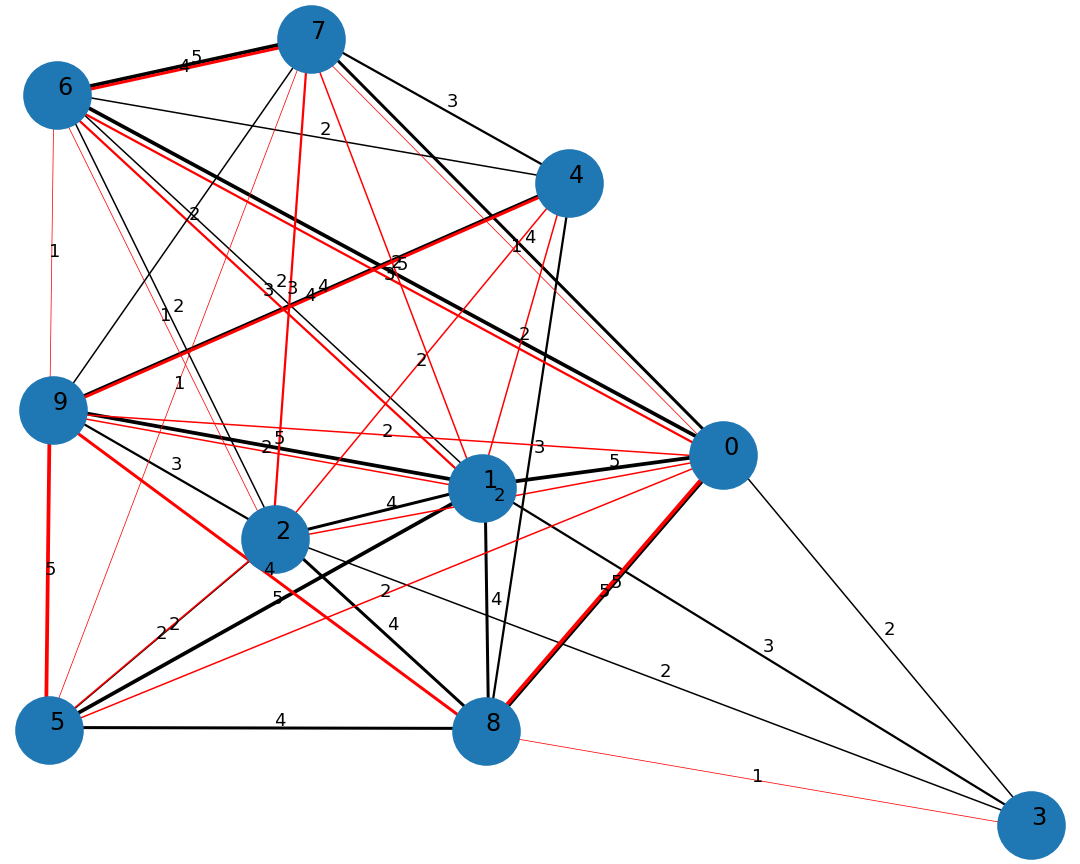

In [46]:
visualize()

In [47]:
# Helper functions...
def printtype(elem):
    if (type(elem)==np.datetime64):
        print('\''+str(pd.to_datetime(elem).date())+'\'',end=" ")
    elif (type(elem) in [np.float, np.float32, np.float64]):
        print("{0:.2f} ".format(elem), end="")
    else:
        print(elem, end=" ")
def printval(*args, end=''):
    for arg in args:
        if (type(arg) in [np.ndarray, list, np.array]):
            print('[', end='')
            for x in arg:
                printval(x, end=',')
            print(']',end=end)
        else:
            printtype(arg)
    print(" ", end=end)

# Conventional Updates on Q table...

In [48]:
class graphenv:
    def __init__(self, nodes_list):
        self.state=None
        self.mynodes = nodes_list
        self.costs = np.ones(len(mynodes))*1000000
    def reset(self,initial_nodeid=0):
        self.state=mynodes[initial_nodeid]
        return self.state.nodeid
    # action is a step along one of the edges in the edge list
    def step(self, action):
        if (action>len(self.state.adj_list)):
            return -1
        new_nodeid =self.state.adj_list[action]
        edge_cost = self.state.edj_list[action]
        self.state=self.mynodes[new_nodeid]
        #cost = edge_cost
        reward = edge_cost
        return new_nodeid, reward
        

In [49]:
np.ones((5,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [50]:
class graphenv_np:
    def __init__(self, nodes_list):
        self.states=None
        self.adjedges = np.ones((num_nodes, num_nodes)).astype(int)*-1
        self.adjnodes = np.ones((num_nodes, num_nodes)).astype(int)*-1
        self.allnodes = np.array([nodei.nodeid for nodei in nodes_list])
        for i1, nodei in enumerate(nodes_list):
            self.adjedges[i1,:len(nodei.edj_list)] = np.array(nodei.edj_list)
            self.adjnodes[i1,:len(nodei.adj_list)] = np.array(nodei.adj_list)
        #self.costs = np.ones(len)
    def reset(self, initial_nodeids=None):
        self.state = initial_nodeids
        return self.state
    def step(self, actions):
        new_nodeids = self.adjnodes[self.state, actions]
        self.state = new_nodeids
        return

In [192]:
mygraphenv = graphenv_np(mynodes)

In [193]:
init_nodeids = np.random.randint(10, size=20)
actions = np.random.randint(4, size=20)
mygraphenv.reset(init_nodeids)
print(init_nodeids)
print(actions)
mygraphenv.step(actions)
print(mygraphenv.state)

[5 3 3 9 7 3 2 0 5 3 2 9 4 4 4 3 8 6 7 9]
[2 1 1 0 0 3 3 0 3 2 0 0 1 1 2 3 2 3 0 1]
[-1 -1 -1  0  9 -1  1  9 -1 -1  9  0  3  3  2 -1 -1 -1  9 -1]


In [194]:
mygraphenv.adjnodes, mygraphenv.adjedges, mygraphenv.allnodes

(array([[ 9,  7,  6,  1, -1, -1, -1, -1, -1, -1],
        [ 0,  9, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 9,  6,  3,  1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 7,  3,  2,  6, -1, -1, -1, -1, -1, -1],
        [ 6,  4, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 9,  1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 9,  2,  6,  1, -1, -1, -1, -1, -1, -1],
        [ 7,  0, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1]]),
 array([[ 5,  4,  3,  2, -1, -1, -1, -1, -1, -1],
        [ 5,  1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 5,  4,  3,  3, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 4,  5,  3,  1, -1, -1, -1, -1, -1, -1],
        [ 5,  1, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 5,  4, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 3,  5,  1,  4, -1, -1, -1, -1, -1, -1],
        [ 2,  2, -1, -1, -1, -1, -1, -1, -1, -1],
        [ 5, -1, -1, -1, -1, -1, -1, -1, -1, -1]

In [24]:
for node in mynodes:
    print(node)

0:[7, 4][4, 3]
1:[0][1]
2:[][]
3:[5, 4][2, 1]
4:[6, 5][5, 4]
5:[2, 3][5, 5]
6:[9, 8, 4][2, 3, 3]
7:[3][5]
8:[3, 9, 4][5, 2, 4]
9:[2, 6][1, 5]


In [51]:
#########Exploration vs Exploitation
lr, e=0.25,0.6
############
maxval=1000
Q = np.ones((num_nodes, num_nodes))*maxval
for node in mynodes:
    Q[node.nodeid, len(node.edj_list):]=-1
    
des_stateid=9
episodeid=0
myenv = graphenv(mynodes)
myenv.reset(0)
curr_stateid = myenv.state.nodeid
new_stateid = curr_stateid

while episodeid<500:
    #print(episodeid, curr_stateid, new_stateid, end=' ')
    curr_stateid=new_stateid
    all_actions = Q[curr_stateid, :]
    if (len(mynodes[curr_stateid].edj_list)==0):
        new_stateid = myenv.reset(0)
        #print('reached state ', curr_stateid,'.Restarting episode ', episodeid)
        continue
    
    action = np.random.randint(len(mynodes[curr_stateid].edj_list)) if (np.random.rand()<e) else np.argmin(all_actions[all_actions>0])
    new_stateid, reward = myenv.step(action)
    #print(action, new_stateid, myenv.state.nodeid)
    
    if (new_stateid==des_stateid):
        Q[curr_stateid, action] = (1-lr)*Q[curr_stateid,action]+lr*(reward+np.min([0]))
        episodeid+=1
        new_stateid = myenv.reset(0)
        if (episodeid%50)==0:
            printval(episodeid, Q[mynodes[0].nodeid, :], end='\n')
    else:
        new_actions = Q[new_stateid, :]
        Q[curr_stateid, action] = -1 if (len(mynodes[new_stateid].edj_list)==0) else (1-lr)*Q[curr_stateid,action]+lr*(reward+np.min(new_actions[new_actions>0]))
            

50 [6.01  ,353.97  ,38.44  ,-1.00  ,628.40  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
100 [6.00  ,20.38  ,12.39  ,-1.00  ,69.76  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
150 [6.00  ,14.14  ,12.02  ,-1.00  ,37.41  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
200 [6.00  ,14.01  ,12.00  ,-1.00  ,17.47  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
250 [6.00  ,14.00  ,12.00  ,-1.00  ,16.09  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
300 [6.00  ,12.60  ,12.00  ,-1.00  ,16.03  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
350 [6.00  ,10.04  ,12.00  ,-1.00  ,16.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
400 [6.00  ,10.00  ,12.00  ,-1.00  ,16.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
450 [6.00  ,10.00  ,12.00  ,-1.00  ,16.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 
500 [6.00  ,10.00  ,12.00  ,-1.00  ,16.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,-1.00  ,]
 


In [37]:
action, myenv.state.nodeid, curr_stateid, np.random.randint(len(mynodes[curr_stateid].edj_list))

(2, 0, 9, 1)

In [34]:
np.random.uniform(len(mynodes[curr_stateid].edj_list)-.1), len(mynodes[curr_stateid].edj_list), len(mynodes[curr_stateid].edj_list)-.1

(0.9371864231207492, 1, 0.9)

In [16]:
printval(episodeid, Q[mynodes[6].nodeid, :], end='\n')

5000 [13.0000  ,8.0000  ,14.0000  ,5.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,-1.0000  ,]
 


In [26]:
for node in mynodes:
    print(node)

0:[9, 7, 6, 1][5, 4, 3, 2]
1:[0, 9][5, 1]
2:[9, 6, 3, 1][5, 4, 3, 3]
3:[][]
4:[7, 3, 2, 6][4, 5, 3, 1]
5:[6, 4][5, 1]
6:[9, 1][5, 4]
7:[9, 2, 6, 1][3, 5, 1, 4]
8:[7, 0][2, 2]
9:[0][5]


# Tensorflow based Minimization

In [52]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1690235088754650593,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9801417344
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12523901766868738676
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [53]:
INITIAL_LEARNING_RATE=0.1
LEARNING_RATE_DECAY_FACTOR = 0.99     # The decay to use for the moving average.

decay_steps = 1000

In [55]:
if ('sess' in vars()) or ('sess' in globals()):
    sess.close()
    del(sess)
    del(Qout, predict, nextQ, loss, apply_gradient_op)
    print('Previous Session Closed...')
from tensorflow.python.framework import ops
tf.reset_default_graph()
ops.reset_default_graph()

# Set learning parameters
#y = .99
y=1.00
e = 0.6
num_episodes = 1000
maxval=-10

#with tf.Session(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True)) as sess:

In [56]:
dtype=tf.float32

n_units = 3
batch_size=512
with tf.device('/device:GPU:0'):
    inputs1 = tf.placeholder(shape=[batch_size, num_nodes], dtype=tf.float32)
    l1in = inputs1
    #l1in = tf.reshape(inputs1, (1,-1))
    l1weights = tf.get_variable('l1weights', [num_nodes, n_units], initializer = tf.truncated_normal_initializer(stddev=0.1, dtype=dtype, seed=1), dtype=dtype)
    l1biases = tf.get_variable('l1biases', [n_units], initializer=tf.constant_initializer(0.1), dtype=dtype)
    l1out = tf.nn.swish(tf.nn.bias_add(tf.matmul(l1in, l1weights), l1biases)) #tf.nn.bias_add(tf.matmul(l1in, l1weights), l1biases) #
    ################
    #l2weights = tf.get_variable('l2weights', [n_units, n_units], initializer = tf.truncated_normal_initializer(stddev=0.1, dtype=dtype), dtype=dtype)
    #l2biases = tf.get_variable('l2biases', [n_units], initializer=tf.constant_initializer(0.1), dtype=dtype)
    #l2out = tf.nn.swish(tf.nn.bias_add(tf.matmul(l1out, l2weights), l2biases))
    l2out=l1out
    ################
    l3weights = tf.get_variable('l3weights', [n_units, num_nodes], initializer = tf.truncated_normal_initializer(stddev=0.1, dtype=dtype, seed=1), dtype=dtype)
    l3biases = tf.get_variable('l3biases', [num_nodes], initializer=tf.constant_initializer(0.1), dtype=dtype)
    Qout = tf.nn.bias_add(tf.matmul(l2out, l3weights), l3biases)
    
    predict = tf.argmin(Qout,1)
    Q1out = Qout #tf.squeeze(Qout, axis=1)
    nextQ = tf.placeholder(shape=[batch_size, num_nodes],dtype=tf.float32)
    loss = tf.reduce_sum(tf.square(nextQ - Q1out)) #tf.reduce_sum(tf.square(nextQ - Q1out), axis=1)
    print(nextQ.shape, Qout.shape, Q1out.shape, loss.shape)
    #trainer = tf.train.GradientDescentOptimizer(learning_rate=1e-3)
    #apply_gradient_op = trainer.minimize(loss)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(512, 10) (512, 10) (512, 10) ()


In [57]:
Qout.shape

TensorShape([Dimension(512), Dimension(10)])

In [58]:
global_step = tf.train.get_or_create_global_step()

lr = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                      global_step,
                                      decay_steps,
                                      LEARNING_RATE_DECAY_FACTOR,
                                      staircase=True)


opt = tf.train.AdamOptimizer(lr) #(1e-5)
grads_and_vars = opt.compute_gradients(loss)
apply_gradient_op = opt.apply_gradients(grads_and_vars, global_step=global_step)

sess = tf.InteractiveSession(config=tf.ConfigProto(allow_soft_placement=False, log_device_placement=True))

init = tf.global_variables_initializer()
sess.run(init) 

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1



In [59]:
one_hot_vectors = np.identity(num_nodes).astype('float32')
ONE_HOT=True

get_input = lambda s: one_hot_vectors[s] if (ONE_HOT==True) else [s/10]


In [60]:
#create lists to contain total rewards and steps per episode
jList = []
rList = []

num_episodes = 1000 #2 #10000 #10000

for i in range(num_episodes):
    #Reset environment and get first new observation
    if (i%100)==0:
        a,allQ, globalstepval, lrval = sess.run([predict,Q1out, global_step, lr],feed_dict={inputs1:get_input(0)})
        printval(i, globalstepval, lrval, allQ, end='\n')
    myenv.reset(0)
    s = myenv.state.nodeid
    s1 = s

    rAll = 0
    j = 0
    #The Q-Network
    while j < 99:
        j+=1
        #Choose an action by greedily (with e chance of random action) from the Q-network
        a,allQ = sess.run([predict,Q1out],feed_dict={inputs1:get_input(s)})
        targetQ = allQ
        #if np.random.rand(1) < e:
        #    a[0] = env.action_space.sample()
        if (len(mynodes[s].edj_list)==0):
            targetQ[:]=maxval
            #targetQ[a[0]] = maxval
        elif (np.random.rand()<e):#choose a random edje to follow from the edge list
            a[0] = np.random.randint(len(mynodes[s].edj_list)) #np.random.randint(num_nodes) #
            
        targetQ[len(mynodes[s].edj_list):]=maxval
        
        #if (a[0]>=len(mynodes[s].edj_list)): #invalid state...            
        #    targetQ[a[0]]=maxval
        #else:
        if (a[0]<len(mynodes[s].edj_list)):
            #printval(j, s, a[0], targetQ, get_input(s), end=' ') #if (s==6): printval(j, s, a[0], targetQ, get_input(s), end=' ')
            #Get new state and reward from environment
            s1,r = myenv.step(a[0])
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Q1out,feed_dict={inputs1:get_input(s1)})
            #Obtain maxQ' and set our target value for chosen action.
            minQ1 = np.min(Q1[Q1>0])
            
            if (s1==des_stateid):
                minQ1=0
            targetQ[a[0]] = r + y*minQ1
        #Train our network using target and predicted Q values
        #if (s==0): print(targetQ)
        #printval(s1, r, minQ1, targetQ, end='\n') #if (s==6): printval(s1, r, minQ1, targetQ, end='\n')
        _ = sess.run(apply_gradient_op, feed_dict={inputs1:get_input(s),nextQ:targetQ})
        rAll += r
        s = s1
        if (s1 == des_stateid) or (len(mynodes[s].edj_list)==0):
            #Reduce chance of random action as we train the model.
            #e = 1./((i/50) + 10)
            break
    jList.append(j)
    rList.append(rAll)

print("Percent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")

ValueError: Cannot feed value of shape (10,) for Tensor 'Placeholder:0', which has shape '(512, 10)'

In [143]:
for node in mynodes:
    print(node)

0:[9, 7, 6, 1][5, 4, 3, 2]
1:[0, 9][5, 1]
2:[9, 6, 3, 1][5, 4, 3, 3]
3:[][]
4:[7, 3, 2, 6][4, 5, 3, 1]
5:[6, 4][5, 1]
6:[9, 1][5, 4]
7:[9, 2, 6, 1][3, 5, 1, 4]
8:[7, 0][2, 2]
9:[0][5]


In [236]:
weights_val

array([[ 2.44046650e+01, -3.69523895e+02, -2.91574585e+02,
        -5.73036316e+02, -9.88318026e-03, -3.79128382e-02,
         3.30982022e-02, -1.39387511e-02, -5.53704565e-03,
        -3.11288200e-02],
       [ 2.59269371e+01,  3.19951172e+03,  2.00011304e+03,
         3.06274462e-02,  1.35999622e+03,  2.95931006e+03,
         2.66558813e+03,  7.62871793e-03,  3.13557764e+03,
         2.17597656e+03],
       [ 2.34345512e+01, -3.69026306e+02, -2.90604584e+02,
         1.85212411e-03, -9.85652860e-03, -5.73601946e-02,
         2.85889469e-02, -2.53741816e-02,  5.60359769e-02,
         1.57677401e-02],
       [ 7.14757442e-02,  1.78955533e-02, -2.97714863e-02,
        -1.26766739e-02, -5.95616959e-02, -1.36037478e-02,
        -3.18255536e-02,  1.47862323e-02,  1.50573906e-02,
        -4.35347259e-02],
       [ 2.78882294e+01, -3.66051422e+02, -2.91072144e+02,
         2.34537553e-02, -6.25500530e-02,  6.11704476e-02,
         2.50597540e-02, -1.62459060e-03,  6.27861395e-02,
        -3.

In [221]:
myenv.step(a[0])

-1

In [216]:
sess.close()

In [15]:
A = np.zeros((len(mynodes), len(mynodes)))
for node in mynodes:
    for node_adj,node_edj in zip(node.adj_list, node.edj_list):
        A[mynodes[node.nodeid].nodeid, mynodes[node_adj].nodeid] = node_edj

In [16]:
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
A = np.array([(0, 0.3, 0.4, 0.7),
               (0.3, 0, 0.9, 0.2),
               (0.4, 0.9, 0, 0.1),
               (0.7, 0.2, 0.1, 0)
               ])*10

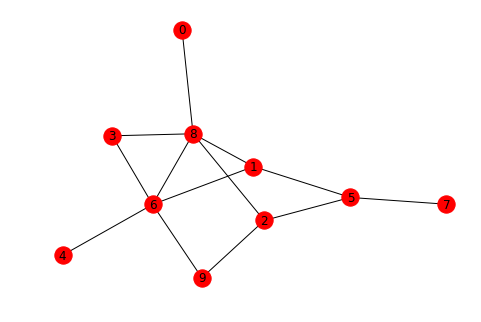

In [20]:
G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),[mynode.nodeid for mynode in mynodes])))    

nx.draw(G, with_labels=True, pos=nx.spring_layout(G))

In [6]:
pos = nx.spring_layout(G)
#pos = nx.circular_layout(G)

NameError: name 'nx' is not defined

In [53]:
pos

{0: array([1.00000000e+00, 2.66236709e-08]),
 1: array([0.809017  , 0.58778527]),
 2: array([0.30901698, 0.95105656]),
 3: array([-0.30901702,  0.9510565 ]),
 4: array([-0.80901705,  0.58778521]),
 5: array([-9.99999982e-01, -6.07991049e-08]),
 6: array([-0.80901693, -0.58778533]),
 7: array([-0.30901708, -0.95105645]),
 8: array([ 0.30901713, -0.95105645]),
 9: array([ 0.80901694, -0.58778527])}